# Flower Species Classification based on Iris Dataset 
Model Selection and EDA

By: Suryash Chakravarty, Hooman Esteki, Bright Arafat Bello

Github URL: https://github.com/hoomanesteki/iris-ml-predictor

## Libraries

In [5]:
import pandas as pd 
import altair as alt 
import numpy as np 
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from ucimlrepo import fetch_ucirepo

In [6]:
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

## Summary

Here we attempted to build a classification model using the well-known Iris dataset. We employed a Decision Tree Classifier to predict the species of iris flowers based on their features: sepal length, sepal width, petal length, and petal width. The model was trained on a portion of the dataset and evaluated on a separate test set to assess its performance.

Our final model performed well, achieving a high accuracy (`87%`) on the test set.

## Introduction

This analysis uses the Iris dataset, a classic dataset in machine learning and statistics. The dataset consists of 150 samples of iris flowers, each described by four features: `sepal length`, `sepal width`, `petal length`, and `petal width`. The target variable is the `species` of the iris flower, which can be one of three species: `Iris setosa`, `Iris versicolor`, or `Iris virginica`.

The columns in this dataset are:

`sepal length`, `sepal width`, `petal length`, `petal width`, `class`

The goal of this analysis is to build a classification model that can accurately predict the species of an iris flower based on its features. We will use a `DecisionTreeClassifier` model to complete this prediction, and provide a sumary of the results we obtain from this model, including its score on the test data.

## Methods and Results

First, let's load our data to a variable called `iris`.

In [31]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
#iris.to_csv('data/iris.csv', index=False)


In [8]:
iris = iris.data.original
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Do we have any null values? Let's check.

In [9]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
len(iris)

150

150 non null values in each column, and a total of 150 rows. Therefore, no null values exist. Good.

Let's check the distribution of each class in the dataset.

In [12]:
iris['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Each class has exactly 50 instances.

Before doing any more EDA, lets split our data into train and test.

In [13]:
iris_train, iris_test = train_test_split(iris, test_size=0.2, random_state=522)
iris_train.head()

,sepal length,sepal width,petal length,petal width,class
51,6.4,3.2,4.5,1.5,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor
43,5.0,3.5,1.6,0.6,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica


Lets see what the spread looks like for each class

**Figure 1.** Pairplot of sepal and petal features coloured by species.  
The plot highlights that *Iris setosa* forms a distinct cluster, while *versicolor* and *virginica* show partial overlap in petal-related features.


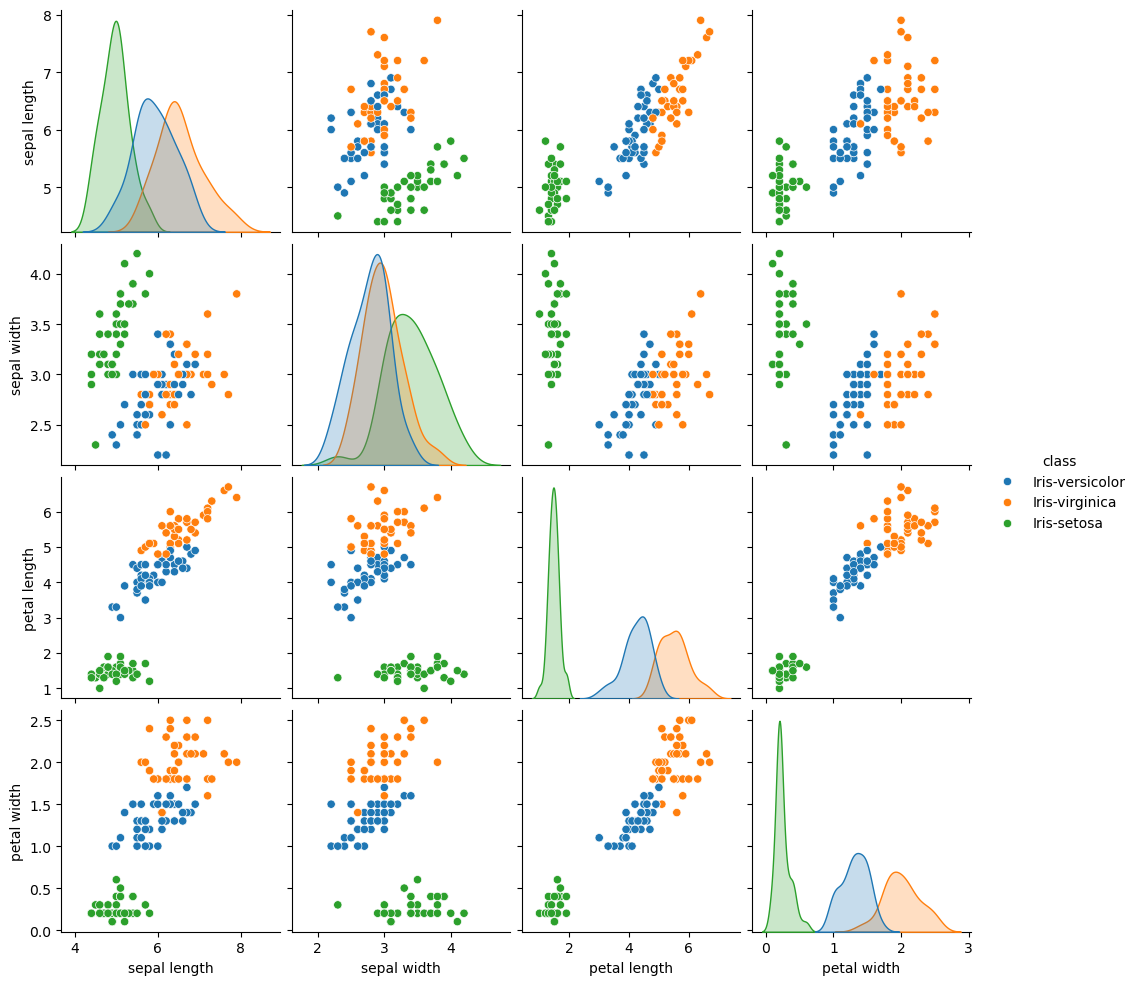

In [14]:
plt = sns.pairplot(iris_train, hue='class')
plt

###### Code partially referenced from DSCI 571.

From the pairwise comparison chart above, we can see that `setosa` has the smallest petal width and length while `virginica` has the largest.

Is there a correlation between our features? Lets see.

**Figure 2.** Correlation matrix of the numeric features.  
Petal length and petal width are highly positively correlated, and both are strongly related to sepal length, suggesting they carry similar information for distinguishing species.


<Axes: >

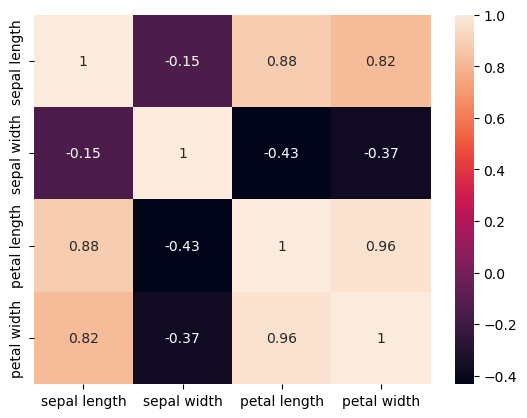

In [15]:
plt_corr = sns.heatmap(iris_train.drop(columns =['class'], axis=1).corr(), annot=True)
plt_corr

We see a strong correaltion between petal length and sepal length. As well, there is a strong correlation between `PetalWidthCm` and `PetalLengthCm`. This implies that the wider a petal is, the longer it also could be.

Lets see what the distribution of Petal Length looks like for each of our species

**Figure 3.** Distribution of petal length for each iris species.  
This plot shows that *Iris setosa* has very short petals, *Iris virginica* tends to have the longest petals, and *Iris versicolor* falls in between, which explains why petal length is highly informative for classification.


In [24]:
plt_ptlen = alt.Chart(
	iris_train, 
	title='Distribution of Petal Length by Flower Species'
).mark_bar(opacity=0.5).encode(
	x = alt.X('petal width').bin(maxbins=50).sort('-y'),
	y = alt.Y('count()').scale(zero=False).stack(False),
	color = 'class'
)
plt_ptlen

alt.Chart(...)

From the chart above, we can see that `Setosa` flower has the smallest petal size while `Virginica` is the largest. 

Lets fit a classification model to our data.

Lets first isolate our variables into X_train, X_test, y_train, and y_test. We also need to convert our classification variable to numeric instead of character.

In [17]:
X_train, X_test = iris_train.drop(columns=['class']), iris_test.drop(columns=['class'])
y_train, y_test = iris_train[['class']], iris_test[['class']]

y_train['class']=y_train['class'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})
y_test['class']=y_test['class'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})

y_test.head()

/var/folders/hc/dwb__6zd5z53z2zw72wdhhlr0000gn/T/ipykernel_47862/3253766961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['class']=y_train['class'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})
/var/folders/hc/dwb__6zd5z53z2zw72wdhhlr0000gn/T/ipykernel_47862/3253766961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['class']=y_test['class'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})


,class
86,1
135,2
119,2
118,2
127,2


Lets start with a `DummyClassifier` object.

In [18]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

,strategy,'prior'
,random_state,None
,constant,None


In [19]:
dummy.score(X_test, y_test)

0.3

The dummy classifier achieves an accuracy of 0.33 on the test set, which is expected since it randomly predicts one of the three classes.

Now we fit a Decision Tree Classifier to our data.

In [20]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
tree.score(X_test, y_test)

0.8666666666666667

We see that the decision tree classifier achieves an accuracy of approximately `87%` on the test set, which is a significant improvement over the dummy classifier. This indicates that the decision tree model is able to effectively capture patterns in the data to make accurate predictions about the species of iris flowers based on their features.

**Table 1.** Classification report for the decision tree classifier on the test set.  
The model performs perfectly on *Iris setosa*, while *versicolor* and *virginica* show slightly lower precision and recall due to their overlapping feature distributions.


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      0.78      0.78         9
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



**Figure 4.** Confusion matrix for the decision tree classifier on the test set.  
The model correctly predicts all *Iris setosa* samples, while most errors occur between *versicolor* and *virginica*, which have more similar feature measurements.


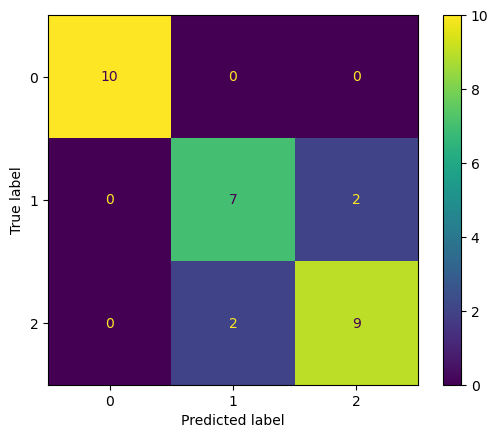

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()

## Discussion

We observe that the model predicts `Iris setosa` perfectly, while there are some misclassifications between `Iris versicolor` and `Iris virginica`. This is likely due to the fact that these two species have more similar feature values compared to `Iris setosa`, which is distinctly different in terms of petal length and width.

This model will be able to accurately predict the species of iris flowers based on their features with a high degree of accuracy. Further improvements could be made by tuning the hyperparameters of the decision tree or exploring other classification algorithms.

Future work could include testing this model on different flower species datasets to evaluate its generalizability and robustness.
Future improvements could also involve exploring other models, such as Random Forests or logistic regression, to potentially enhance predictive performance.


## References

1. UCI Machine Learning Repository: Iris Data Set. https://archive.ics.uci.edu/ml/datasets/iris
2. Milestone 1 of DSCI 522.
3. Scikit-learn documentation: https://scikit-learn.org/stable/
4. Seaborn documentation: https://seaborn.pydata.org/
5. DSCI 571 course materials.

In [ ]:
.